# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [ ]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    loss = np.sum(pow(Y - np.dot(X, w), 2))
    return loss

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    gradient = -2 * (y - np.dot(w, x)) * x
    return gradient

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    D = len(w_start)
    losses = np.zeros(shape=(N_epochs, ))
    N = len(X)
    w = w_start

    for e in range(N_epochs):
      for n in range(N):
        w -= eta * gradient(X[n], Y[n], w)
      losses[e] = loss(X, Y , w)
      
    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [ ]:
# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/data/sgd_data.csv')

X = np.concatenate((np.ones(shape=(len(data),1), dtype=int), data[:, :4]), axis=1)
Y = data[:, 4]

In [ ]:
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
b = 0.001
N_epochs = 800
eta = pow(np.e,-15)

w, losses = SGD(X, Y, w_start, eta, N_epochs)
print(w)

[ -0.22720591  -5.94229011   3.94369494 -11.72402388   8.78549375]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

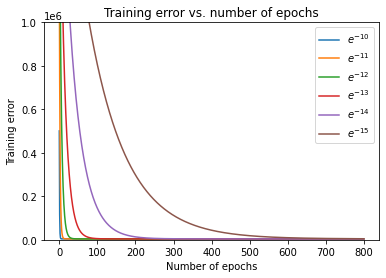

In [ ]:
plt.figure()
plt.title("Training error vs. number of epochs")
plt.ylabel("Training error")
plt.xlabel("Number of epochs")

etas = [pow(np.e,-10), pow(np.e,-11), pow(np.e,-12), pow(np.e,-13), 
        pow(np.e,-14), pow(np.e,-15)]

num_epochs = range(N_epochs)
for eta in etas:
  w, losses = SGD(X, Y, w_start, eta, N_epochs)
  plt.plot(num_epochs, losses)

plt.legend(["$e^{-10}$", "$e^{-11}$", "$e^{-12}$", "$e^{-13}$", "$e^{-14}$", 
            "$e^{-15}$"])
plt.ylim((0,1000000))
plt.show()

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [ ]:
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
